<a href="https://colab.research.google.com/github/AhmadJalal789/Projects/blob/main/anna_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problem definition

**Research Question:**
1. What factors are associated with the rate of increase of Covid-19 cases in different countries?

2. What is the relationship between the percentage of the population aged 65 and over and the number of hospitalizations due to COVID-19? Do countries with a higher percentage of elderly people have higher rates of hospitalization than those with a lower percentage of elderly people?

3. What is the trend in COVID-19 cases and deaths across different regions of the world? Which regions have been most severely affected by the pandemic?





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyparsing
oo = pd.read_csv('/content/owid-covid-data.csv')
oo.head()

#Loading of the dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## 2. Data description

The Summary of features and their statistics (i.e., mean, standard deviation (dev.), maximum (max.) and minimum (min.)).

In [ ]:
oo.describe()

# statistical summary

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.010990e+05,2.008770e+05,1.998720e+05,1.845090e+05,184461.000000,183469.000000,200000.000000,199778.000000,198778.000000,183423.000000,...,125916.000000,82382.000000,150405.000000,193972.000000,166222.000000,2.107820e+05,7.357000e+03,7357.000000,7357.000000,7357.000000
mean,3.739690e+06,8.720300e+03,8.754606e+03,5.228355e+04,85.461328,85.807873,76785.235526,188.777460,189.408765,773.956018,...,32.511657,50.351225,3.096940,73.636112,0.725680,1.057529e+08,3.846924e+04,10.553515,14.683538,1519.806467
std,2.226875e+07,6.230749e+04,6.013408e+04,2.299547e+05,479.028092,428.035489,128473.974185,1087.648684,676.399754,1054.236982,...,13.404692,32.791875,2.564821,7.554815,0.149763,4.691374e+08,1.031194e+05,13.929623,26.839180,1908.657306
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.920000,-1984.281600
25%,5.469500e+03,0.000000e+00,4.571000e+00,1.190000e+02,0.000000,0.000000,1476.520750,0.000000,1.139000,37.143500,...,21.100000,17.450000,1.300000,69.590000,0.611000,7.242720e+05,4.660000e+01,0.760000,0.300000,38.130040
50%,5.946800e+04,3.700000e+01,7.371400e+01,1.139000e+03,0.000000,1.000000,13998.292000,5.456000,17.906000,274.721000,...,33.100000,49.839000,2.397000,75.050000,0.748000,5.637022e+06,5.326501e+03,7.730000,7.740000,881.367860
75%,5.511660e+05,7.530000e+02,8.837140e+02,9.414000e+03,10.000000,11.714000,90277.674500,91.294000,134.018750,1165.365000,...,41.500000,83.241000,4.280000,79.070000,0.845000,2.791454e+07,3.040969e+04,17.140000,20.160000,2531.535200
max,4.286724e+08,2.852797e+06,2.347708e+06,2.853366e+06,60536.000000,10938.143000,718922.955000,193107.077000,36421.827000,6438.492000,...,76.100000,98.999000,13.800000,86.750000,0.957000,4.721383e+09,1.253111e+06,76.550000,376.770000,10112.677000


#### - The data set contains 67 features and 256313 observations

In [ ]:
oo.shape

# size of the dataset, contains 211882 rows and 67 features

(211882, 67)

#### -  There are only three data types in the whole data set:
- Categorical: Nominal data type in features: 'iso_data','continent','location'
- Timeseries is in temporal unit in format: year-month-day: 'date feature'
- Ratio: Numerical data types are the rest 63 features.

In [ ]:
oo.info() # getting general information about features (data types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211882 entries, 0 to 211881
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    211882 non-null  object 
 1   continent                                   200807 non-null  object 
 2   location                                    211882 non-null  object 
 3   date                                        211882 non-null  object 
 4   total_cases                                 201099 non-null  float64
 5   new_cases                                   200877 non-null  float64
 6   new_cases_smoothed                          199872 non-null  float64
 7   total_deaths                                184509 non-null  float64
 8   new_deaths                                  184461 non-null  float64
 9   new_deaths_smoothed                         183469 non-null  float64
 

In [ ]:
oo # displaying the whole data set

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.50,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211877,ZAF,Africa,South Africa,2021-04-23,1572985.0,1637.0,1232.857,54066.0,71.0,57.571,...,33.2,43.993,2.32,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN
211878,ZAF,Africa,South Africa,2021-04-24,1574370.0,1385.0,1241.429,54125.0,59.0,59.143,...,33.2,43.993,2.32,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN
211879,ZAF,Africa,South Africa,2021-04-25,1575471.0,1101.0,1243.143,54148.0,23.0,58.857,...,33.2,43.993,2.32,64.13,0.709,59893884.0,135114.72,19.87,13.87,2274.955
211880,ZAF,Africa,South Africa,2021-04-26,1576320.0,849.0,1258.143,54186.0,38.0,61.286,...,33.2,43.993,2.32,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN


In [ ]:
oo.columns # displaying list of features

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

#### - Each feature is described in detail on [Git repository](https://github.com/owid/covid-19-data/tree/master/public/data)

#### - Apart from three nominal features, all others contain generous amount of Null data values.

In [ ]:
oo.isnull().sum()

# checking for missing values

iso_code                                        0
continent                                   11075
location                                        0
date                                            0
total_cases                                 10783
                                            ...  
population                                   1100
excess_mortality_cumulative_absolute       204525
excess_mortality_cumulative                204525
excess_mortality                           204525
excess_mortality_cumulative_per_million    204525
Length: 67, dtype: int64

##### -- The Null data was replaced with  0 for straightforward calculations

In [ ]:
oo.fillna(0,inplace=True)

# as there were alot of missing values, so dropping them off would caused alot of loss to information gain which is our requirement in terms of model prediction. So we have filled them with value 0.

In [ ]:
oo.isnull().sum()

# We can clearly see there are no missing values now.

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
population                                 0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64

In [ ]:
oo.duplicated().sum()

# After checking duplicated values in data, no duplicated values were found.

0

In [ ]:
oo.head(3) # displaying first three observations

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
oo.tail(3) # displaying last three observations

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
211879,ZAF,Africa,South Africa,2021-04-25,1575471.0,1101.0,1243.143,54148.0,23.0,58.857,...,33.2,43.993,2.32,64.13,0.709,59893884.0,135114.72,19.87,13.87,2274.955
211880,ZAF,Africa,South Africa,2021-04-26,1576320.0,849.0,1258.143,54186.0,38.0,61.286,...,33.2,43.993,2.32,64.13,0.709,59893884.0,0.00,0.00,0.00,0.000
211881,ZAF,Africa,South Africa,2021-04-27,1577200.0,880.0,1262.000,54237.0,51.0,50.000,...,0.0,0.000,0.00,0.00,0.000,0.0,0.00,0.00,0.00,0.000


The following locations which are diffrent categories then countries were remove:
Africa
Asia
Europe
International
Lower middle income
North America
Oceania
South America
Upper middle income
World
England
Scotland
Wales



In [ ]:
# remove locations which are not countries
no_countries = ["Africa", "Asia", "Europe", "International", "Lower middle income","North America","Oceania", "South America","Upper middle income", "World", "High income", "European Union"]

oo = oo[~oo['location'].isin(no_countries)]


In [ ]:
oo.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

India had the most number of cases

In [ ]:
sum_cases_location = oo.groupby('location').agg({'total_cases':'sum'})
sum_cases_location.sort_values(by='total_cases',ascending=False)


# Grouping by the locations to show the count of covid cases

,total_cases
location,
India,2.787988e+10
Brazil,2.014631e+10
France,1.492228e+10
Germany,1.261967e+10
Russia,9.965135e+09
...,...
Pitcairn,0.000000e+00
Northern Mariana Islands,0.000000e+00
Northern Ireland,0.000000e+00


<Axes: xlabel='date'>

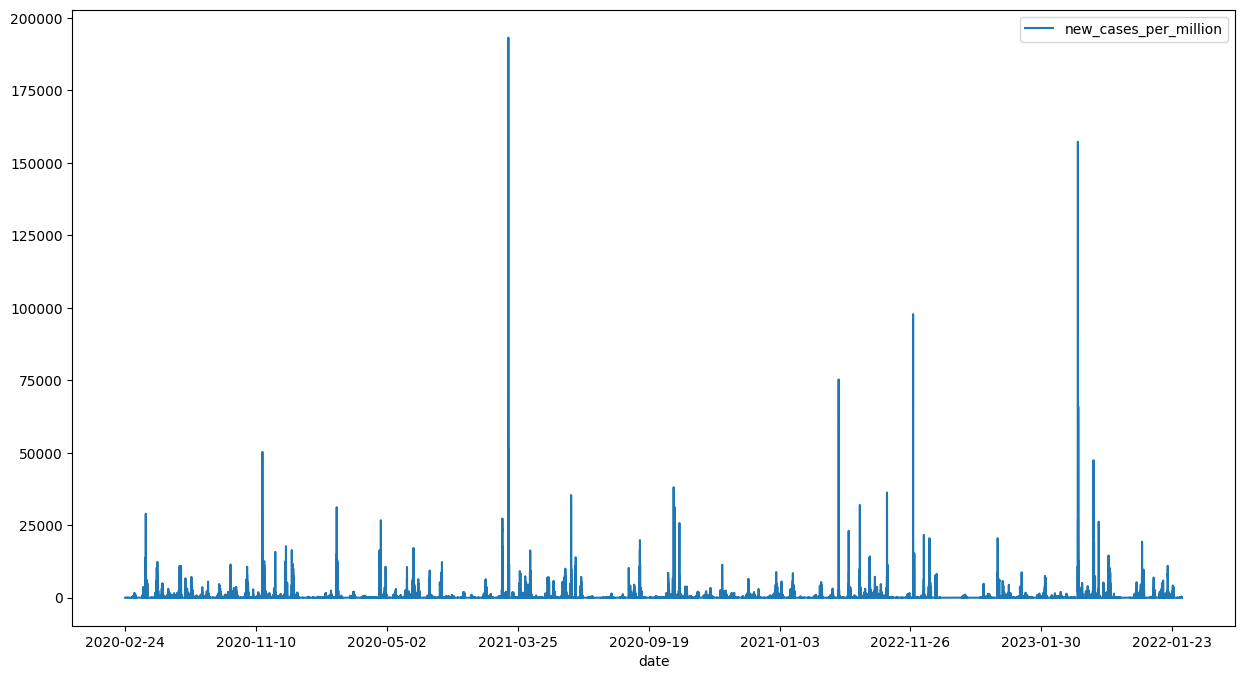

In [ ]:
oo.plot(x='date', y='new_cases_per_million', figsize=(15,8))

# We can see in the graph below that highest number of cases per million population was recorded in year 2021

We can see that positive correlation does not exit between the below mentioned features.

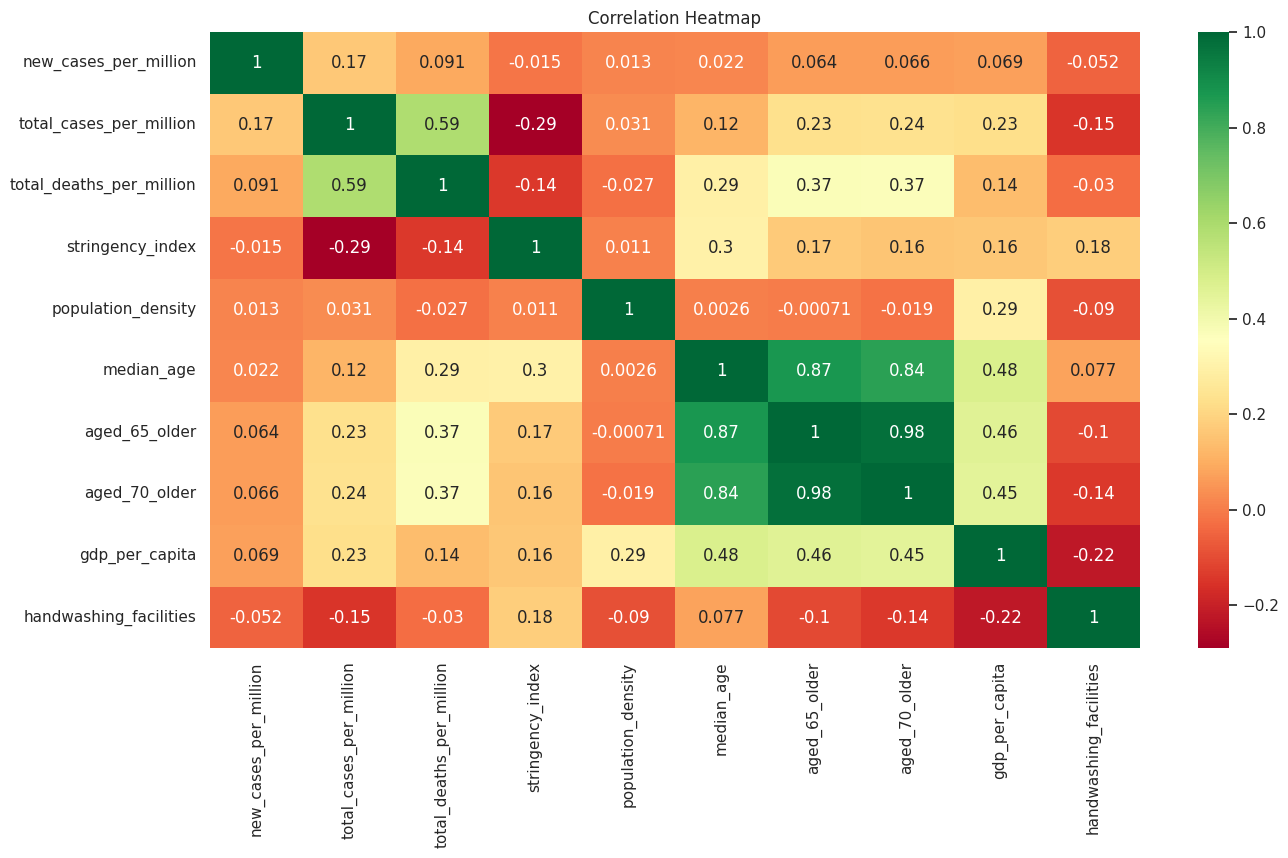

In [ ]:
sns.set(rc={'figure.figsize':(15,8)}) 

selected_columns = oo[['new_cases_per_million', 'total_cases_per_million', 'total_deaths_per_million', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'handwashing_facilities']]
corr_matrix = selected_columns.corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()


#Choosing a values that from the data set and check its corelation with total case per milion

# Modelling

In [ ]:
oo.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## For modeling, We are going to predict human development index, so that would pertain to a Regresion Problem.

## We would use Random Forest Regressor for this purpose.
##For this, we would split the data into training and test subsets and standardize them into one sacle for model's convenience.

In [ ]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201890 entries, 0 to 211881
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    201890 non-null  object 
 1   continent                                   201890 non-null  object 
 2   location                                    201890 non-null  object 
 3   date                                        201890 non-null  object 
 4   total_cases                                 201890 non-null  float64
 5   new_cases                                   201890 non-null  float64
 6   new_cases_smoothed                          201890 non-null  float64
 7   total_deaths                                201890 non-null  float64
 8   new_deaths                                  201890 non-null  float64
 9   new_deaths_smoothed                         201890 non-null  float64
 

In [ ]:
# Dividing dataset into x and y

X=oo.drop(columns=['iso_code', 'continent', 'location', 'date','human_development_index','tests_units'])
y=oo['human_development_index']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Installing libraries

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train_test_split

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Standardization into one scale

In [ ]:
rf = RandomForestRegressor(n_estimators=100,max_depth = 10, random_state=42)
rf.fit(X_train, y_train)

# fitting the model

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# prediction on test set and mse score

Mean squared error: 3.723055035735104e-05


In [ ]:
y_pred  #values after prediction

array([0.67001262, 0.85130725, 0.75002989, ..., 0.89903668, 0.63137467,
       0.8428944 ])

# Analysis of Reseach Questions  (Results)

# Q 1. What factors are associated with the rate of increase of Covid-19 cases in different countries?

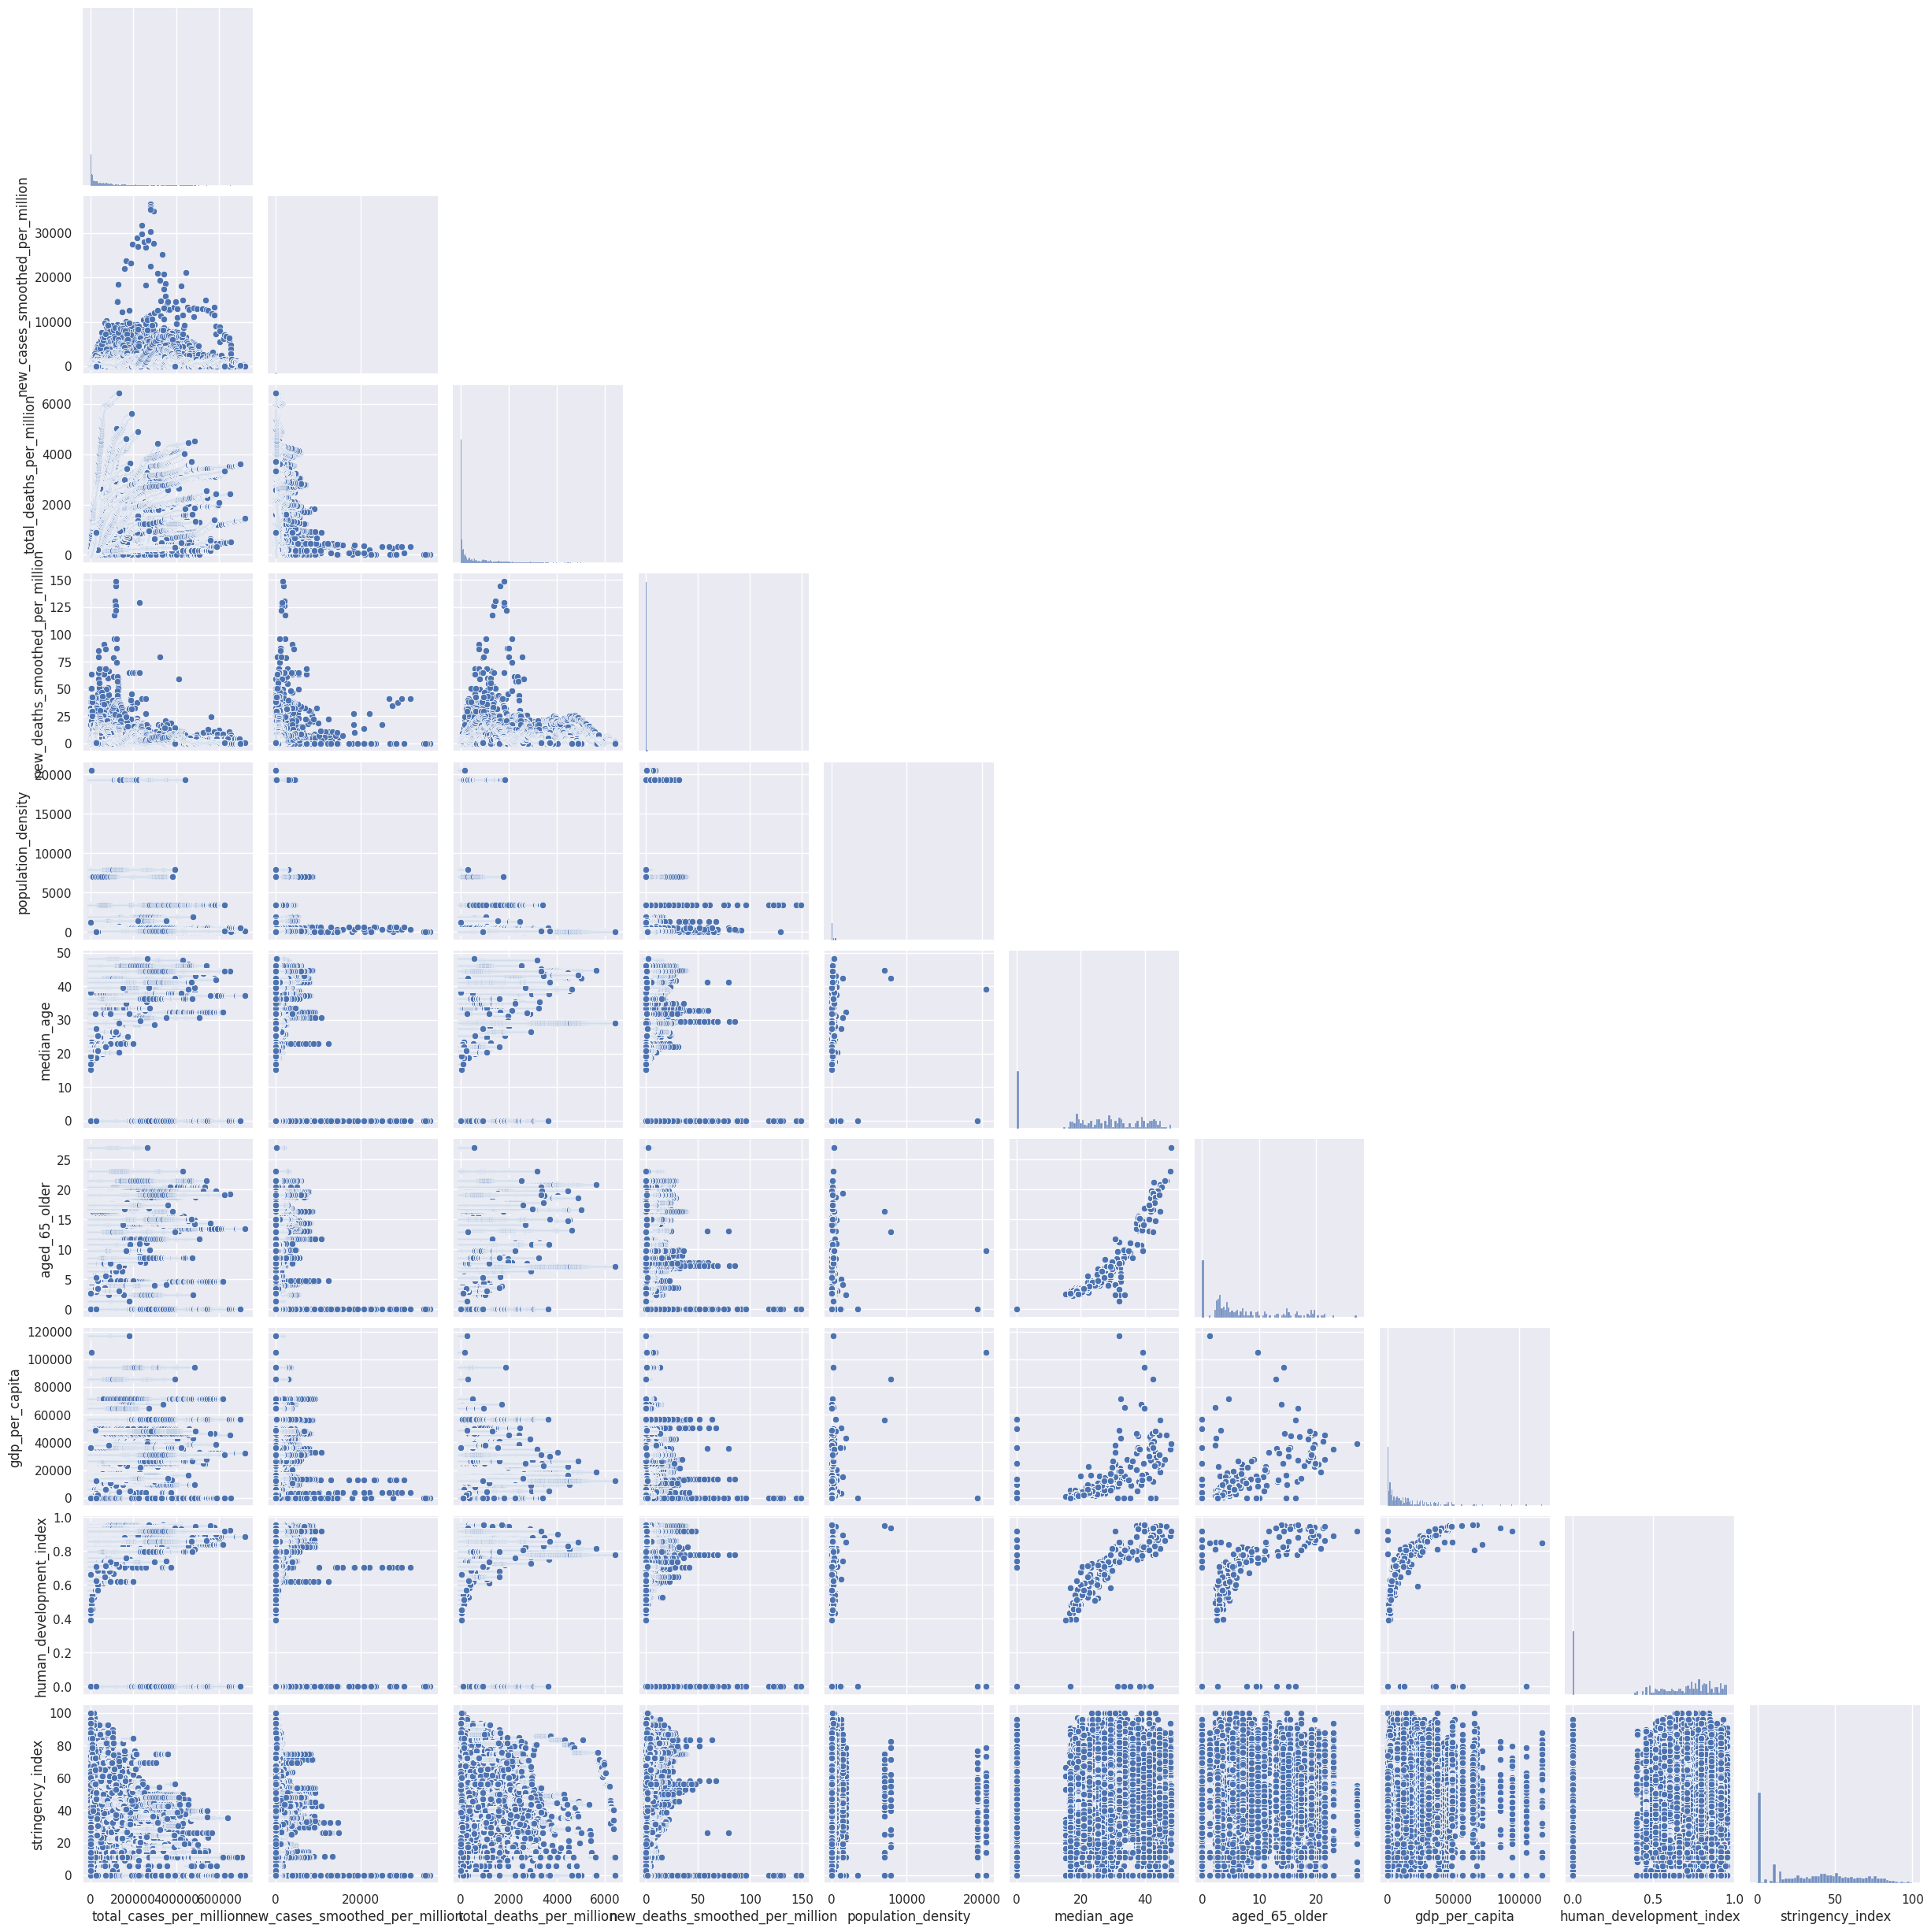

In [ ]:
columns_of_interest = ['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 
                       'new_deaths_smoothed_per_million', 'population_density', 'median_age', 
                       'aged_65_older', 'gdp_per_capita', 'human_development_index', 'stringency_index']


sns.pairplot(oo[columns_of_interest], corner=True)


# pairplot showing relationships to check for correlation

# Observation
From the above visualization, we can see that there is a positive correlation between the stringency index and the number of new cases per million. This means that countries with stricter measures (higher stringency index) tend to have lower rates of increase in new COVID-19 cases, while countries with looser measures (lower stringency index) tend to have higher rates of increase in new COVID-19 cases. We can also see that there is a negative correlation between GDP per capita and the number of new cases per million, indicating that countries with higher GDP tend to have lower rates of increase in new COVID-19 cases. 

We can clearly see that low strict measures caused higher number of cases and vice versa in countries.

<Axes: xlabel='stringency_index', ylabel='new_cases_per_million'>

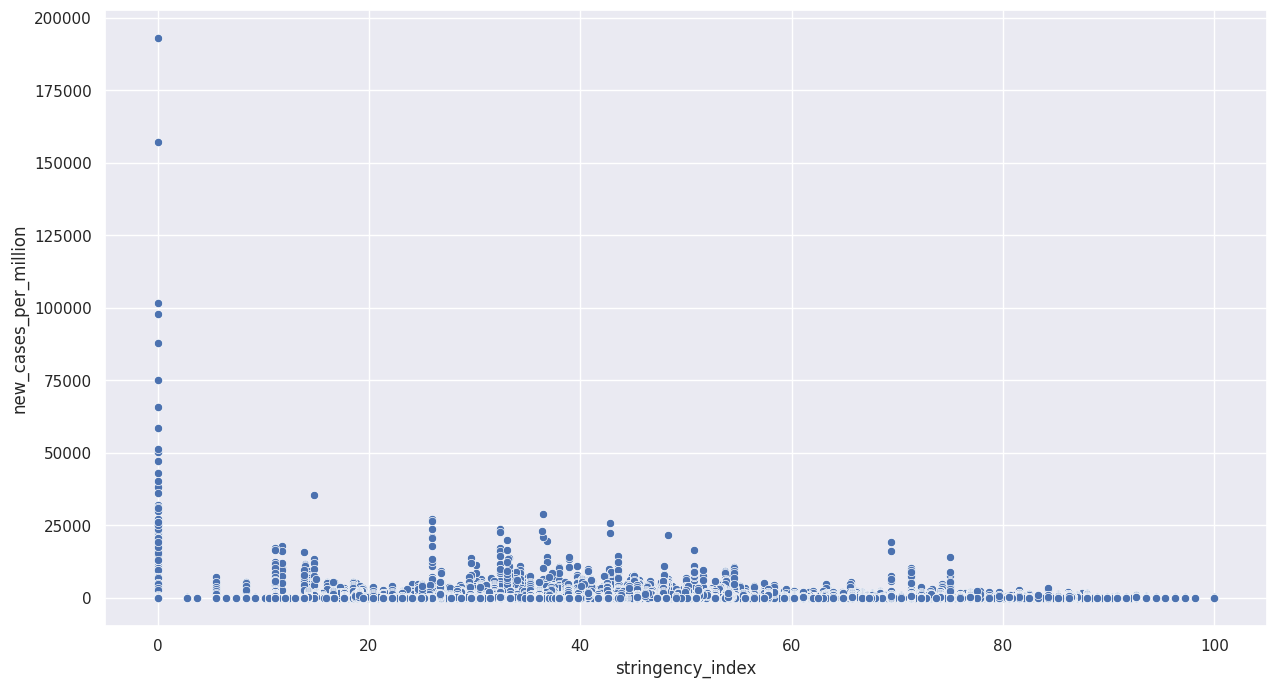

In [ ]:
sns.scatterplot(data=oo, x='stringency_index', y='new_cases_per_million')

# relationship between stringency_index and  new_cases_per_million

## We can confirm that contries that had low gdp per capita or low income had higher number of cases and vice versa

<Axes: xlabel='gdp_per_capita', ylabel='new_cases_per_million'>

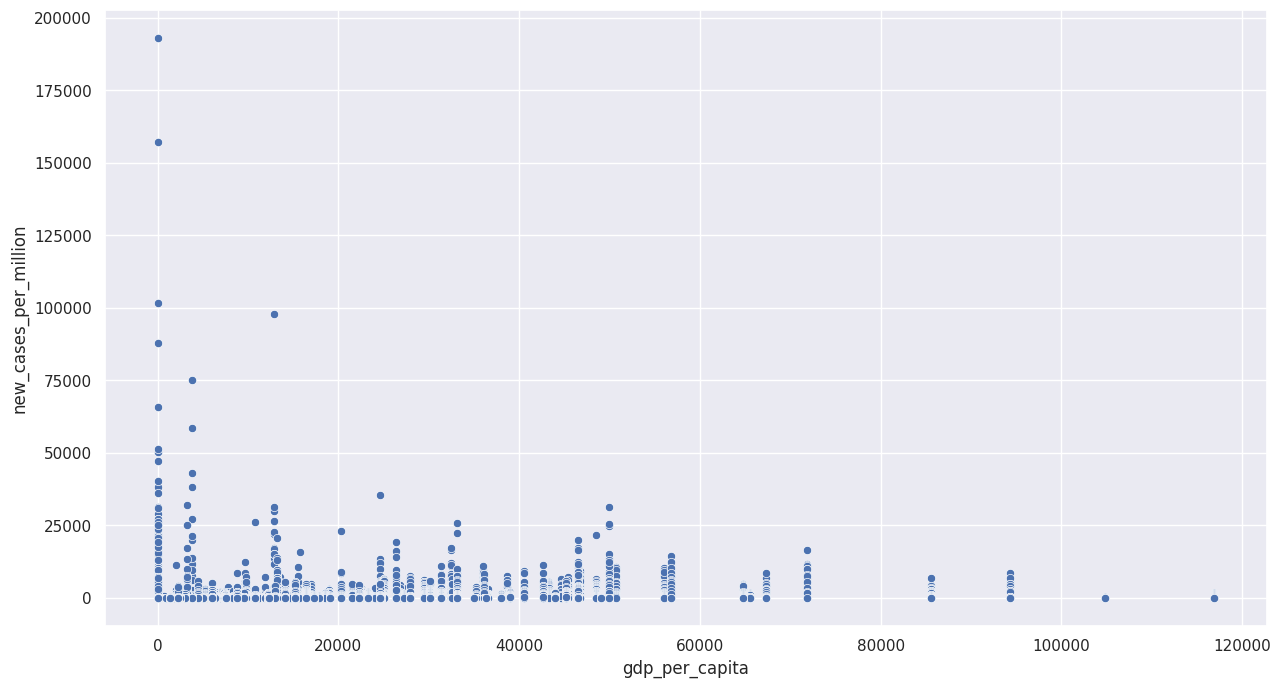

In [ ]:
sns.scatterplot(data=oo, x='gdp_per_capita', y='new_cases_per_million')


# relationship between gdp_per_capita and  new_cases_per_million

# Q 2. What is the relationship between the percentage of the population aged 65 and over and the number of hospitalizations due to COVID-19? Do countries with a higher percentage of elderly people have higher rates of hospitalization than those with a lower percentage of elderly people?

<ipython-input-26-e5aa30e136d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.dropna(inplace=True)


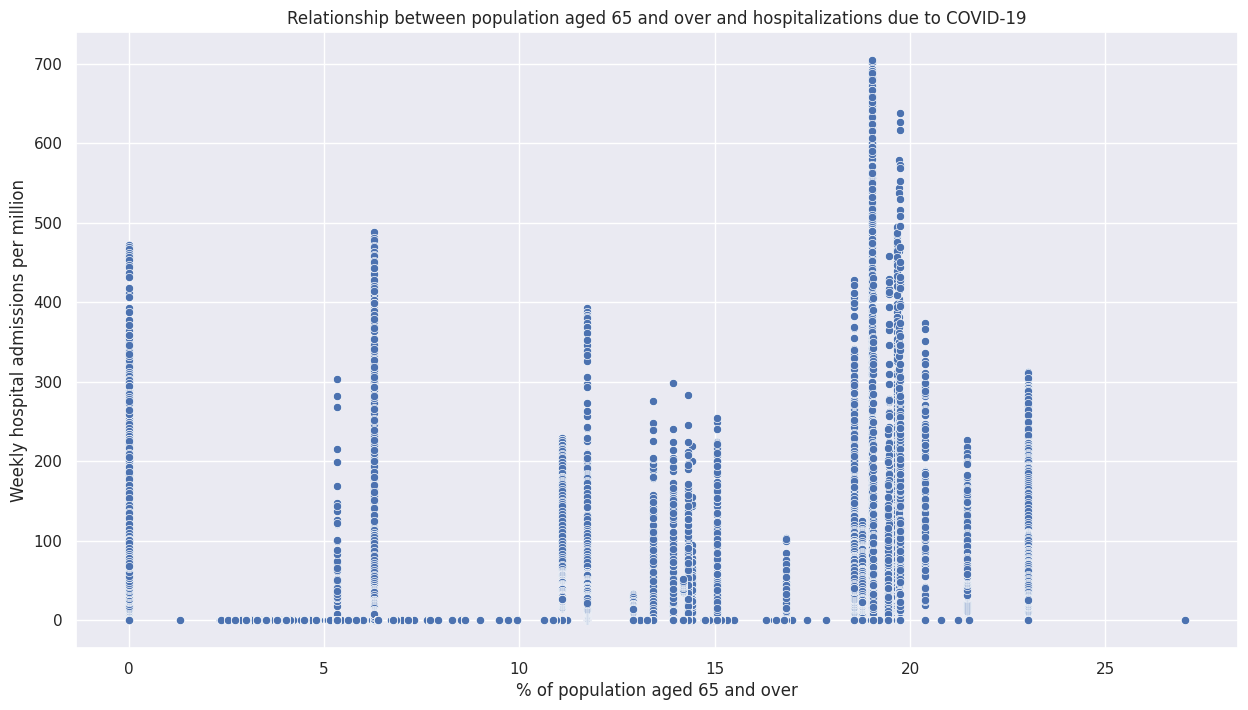

In [ ]:
selected_columns = oo[['weekly_hosp_admissions_per_million', 'aged_65_older']]

selected_columns.dropna(inplace=True)


sns.scatterplot(data=selected_columns, x='aged_65_older', y='weekly_hosp_admissions_per_million')


plt.xlabel('% of population aged 65 and over')
plt.ylabel('Weekly hospital admissions per million')
plt.title('Relationship between population aged 65 and over and hospitalizations due to COVID-19')


plt.show()






# Relationship between population aged 65 and over with hospitalizations due to COVID-19

 The x-axis represents the percentage of the population aged 65 and over, and the y-axis represents the weekly hospital admissions per million people. The plot shows the relationship between these two variables for each country in the dataset.

 # Observation
 From the visualization, it seems that there is a positive correlation between the percentage of the population aged 65 and over and the number of weekly hospital admissions due to COVID-19. This means that countries with a higher percentage of elderly people tend to have higher rates of hospitalization than those with a lower percentage of elderly people. 

# Q 3. What is the trend in COVID-19 cases and deaths across different regions of the world? Which regions have been most severely affected by the pandemic? 

<ipython-input-37-99a91e5ff71b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data =oo.groupby(['continent', 'date']).sum().reset_index()


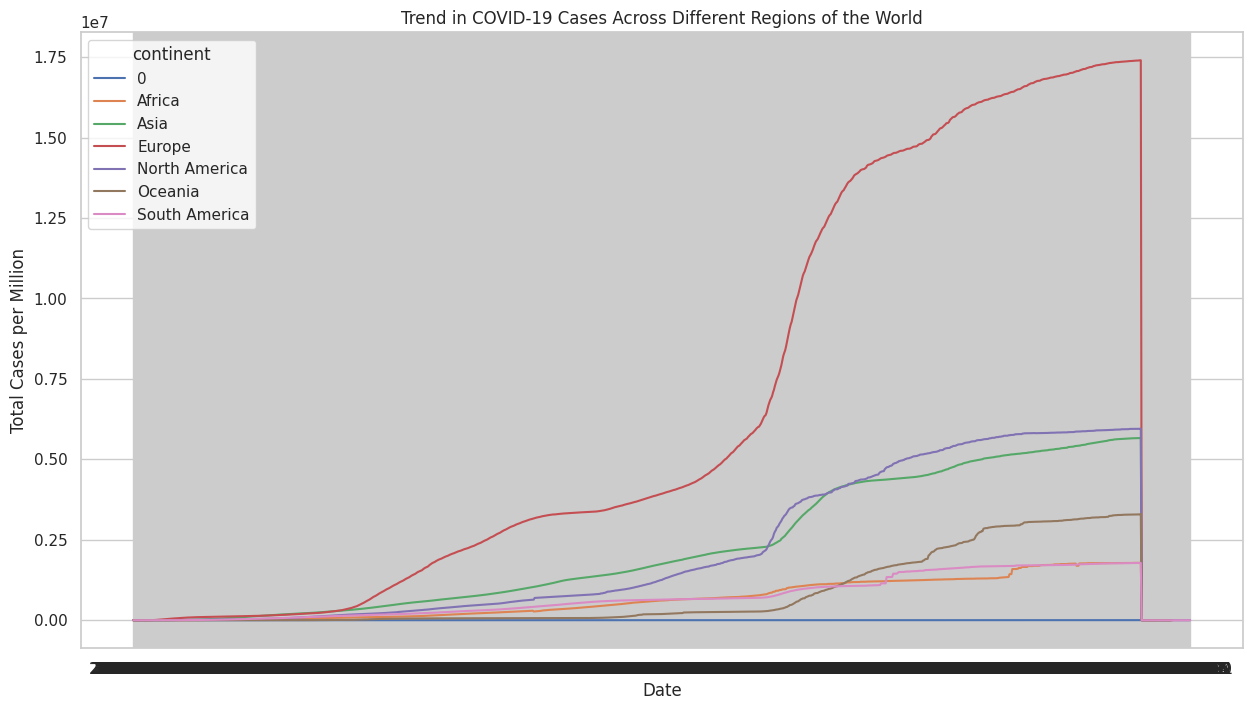

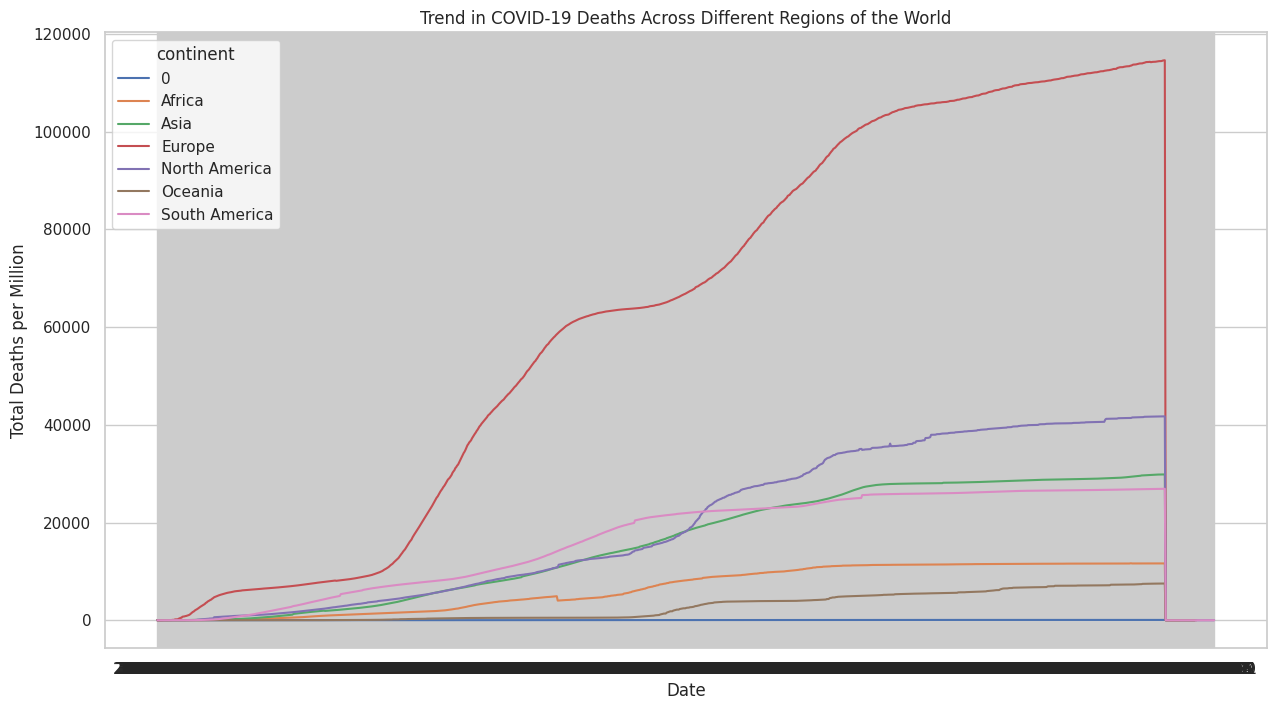

In [ ]:
# Below line plot shows the trend line in different continents

region_data =oo.groupby(['continent', 'date']).sum().reset_index()


sns.set_style("whitegrid")
sns.lineplot(data=region_data, x="date", y="total_cases_per_million", hue="continent")
plt.title("Trend in COVID-19 Cases Across Different Regions of the World")
plt.xlabel("Date")
plt.ylabel("Total Cases per Million")
plt.show()

sns.set_style("whitegrid")
sns.lineplot(data=region_data, x="date", y="total_deaths_per_million", hue="continent")
plt.title("Trend in COVID-19 Deaths Across Different Regions of the World")
plt.xlabel("Date")
plt.ylabel("Total Deaths per Million")
plt.show()


# Note: Oceania is a region of the South Pacific Ocean that comprises multiple islands. 
# The United Nations divides the region into four sub-regions: Australia and New Zealand (including also the Christmas Islands, Keeling Islands, Heard Island and McDonald Islands, and Norfolk Island), Melanesia, Micronesia, and Polynesia.

## We can see in the above graphs, Europian regions were the most affected region both in terms of number of cases recorded and number of deaths recorded.

# Results of model used

In [ ]:
from sklearn.metrics import r2_score

Low Mean Squared error is obtained that means that in prediction of target values, the random forest regressor model has committed less error.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 3.723055035735104e-05


We can see that Random Forest Regressor has performed very well dur to high r2 score

In [ ]:
r2 = r2_score(y_test, y_pred)

# Print the r2 score
print("r2 score:", r2)

r2 score: 0.999610311473467


# Conclusion

We started our project with three research questions in mind, specifically:

1. What factors are associated with the rate of increase of Covid-19 cases in different countries?

2. What is the relationship between the percentage of the population aged 65 and over and the number of hospitalizations due to COVID-19? Do countries with a higher percentage of elderly people have higher rates of hospitalization than those with a lower percentage of elderly people?

3. What is the trend in COVID-19 cases and deaths across different regions of the world? Which regions have been most severely affected by the pandemic?

We used a data driven approach to infer the following conclusion:

1. By our analysis we have found that, regions where their is low strict measures (stringency index) and low GDP per Capita, have resulted more number of cases and areas with high stringency index and high gpa tend to had low covid cases.

2. Countries with a higher percentage of elderly people tend to have higher rates of hospitalization than those with a lower percentage of elderly people.

3. Europian regions were the most affected regions both in terms of number of cases recorded and number of deaths recorded.

We used an approach having the following pros and cons.

# Pros
- The data was cleared was null values which was useful in our analysis and modeling
- Then, data was standardized into one scale for the smooth working of Random Forest Regressor Model
- We used an ensemble model which has more benefits over other models.

# Cons
- Because the data was quite large, there may be chance of overfitting by the model
- There were alot of null values (missing) which were replaced by 0 .
- Features' distribution was not normal which needed standardization process